Delhi NCR 7947
Rest of India 705


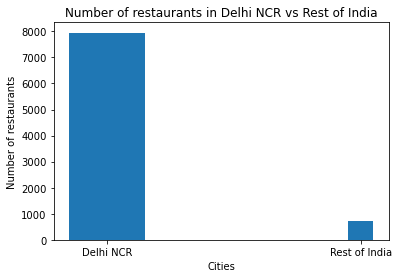

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# function to get the number of restaurants in Delhi NCR and rest of india respectively

def getNumRestaurants():
    totalIndia=df_india.shape[0]
    delhiNcr=0
    delhiNcrCities=["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"]
    
    numRows=df_india.shape[0]    
    
    for i in range(numRows):
        row=df_india.iloc[i]
        city=row["City"]
        
        if city in delhiNcrCities:
            delhiNcr+=1
        
    restOfIndia=(totalIndia-delhiNcr)
    
    return (delhiNcr, restOfIndia)

# getting the dataframe corresponding to Indian restaurants 

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

delhiRestCount=getNumRestaurants()
delhiRestArr=["Delhi NCR", "Rest of India"]

# printing count and plotting graph

for i in range(2):
    print(delhiRestArr[i], delhiRestCount[i])

plt.xlabel("Cities")
plt.ylabel("Number of restaurants")
plt.title("Number of restaurants in Delhi NCR vs Rest of India")

plt.bar(delhiRestArr, delhiRestCount, width=[0.3, 0.1])
plt.show()

In [2]:
# function to print cuisines which are not in Delhi NCR, but present in rest of India

def printCuisinesNotInDelhiNCR():
    delhiNcrCuisines=set()
    RestIndiaCuisines=set()
    delhiNcrCities=["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"]
    
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        city=row["City"]
        cuisines=row["Cuisines"].split(", ")
        
        if city in delhiNcrCities:
            for cuisine in cuisines:
                delhiNcrCuisines.add(cuisine)
        else:
            for cuisine in cuisines:
                RestIndiaCuisines.add(cuisine)
                
#     printing the cuisines
    
    for cuisine in RestIndiaCuisines:
        if not cuisine in delhiNcrCuisines:
            print(cuisine)

# getting the dataframe corresponding to Indian restaurants
            
df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

printCuisinesNotInDelhiNCR()

BBQ
Malwani
Cajun
German


Delhi NCR

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535


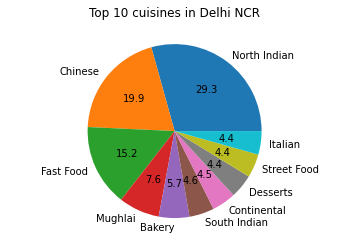


Rest of India

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


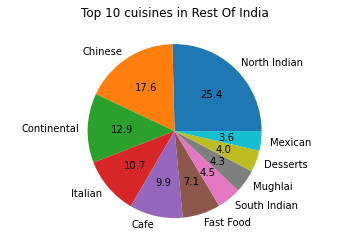

In [3]:
# function to print the top 10 cuisines for Delhi NCR and rest of India and plotting the graph

def printTop10CuisinesAndPlotGraph(forDelhiNcr):
    numRows=df_india.shape[0]    
    cuisineVsCount={}
    delhiNcrCities=["New Delhi", "Ghaziabad", "Noida", "Gurgaon", "Faridabad"]
    
    for i in range(numRows):
        row=df_india.iloc[i]    
        city=row["City"]
        
        if forDelhiNcr:
            if not city in delhiNcrCities:
                continue
        else:
            if city in delhiNcrCities:
                continue
                
        cuisines=row["Cuisines"].split(", ")
        
        for cuisine in cuisines:
            cuisineVsCount[cuisine]=cuisineVsCount.get(cuisine, 0)+1
            
    cuisines=[]
    count=[]
            
    for cuisine in cuisineVsCount:
        cuisines.append(cuisine) 
        count.append(cuisineVsCount[cuisine])
    
    np_cuisines=np.array(cuisines)
    np_count=np.array(count)
    
    sort_order=np.argsort(np_count)[::-1]
    
    if forDelhiNcr:
        print("Delhi NCR")
    else:
        print("Rest of India")
        
    print()
    
#     printing cuisines, count of restaurants serving them and plotting graph
    
    for i in range(10):
        index=sort_order[i]
        
        print(np_cuisines[index], np_count[index])
        
    plt.axis("equal")
    
    if forDelhiNcr:
        plt.title("Top 10 cuisines in Delhi NCR")
    else:
        plt.title("Top 10 cuisines in Rest Of India")

    plt.pie(np_count[sort_order][:10], labels=np_cuisines[sort_order][:10], autopct="%.1f")
    plt.show()
    
# getting the dataframe corresponding to Indian restaurants
    
df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

printTop10CuisinesAndPlotGraph(True)
print()
printTop10CuisinesAndPlotGraph(False)


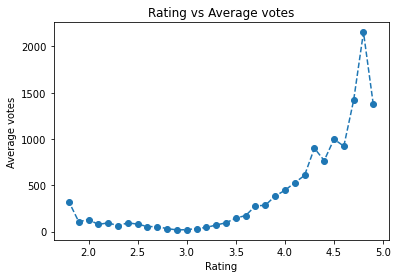

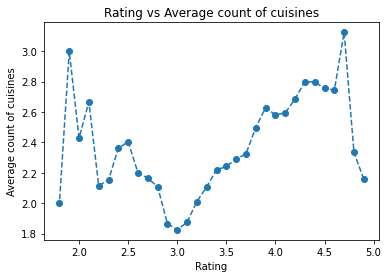

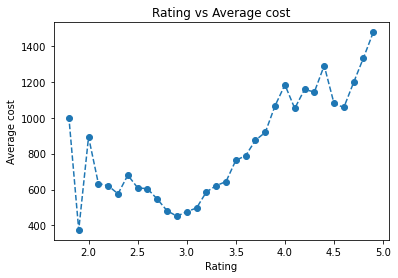

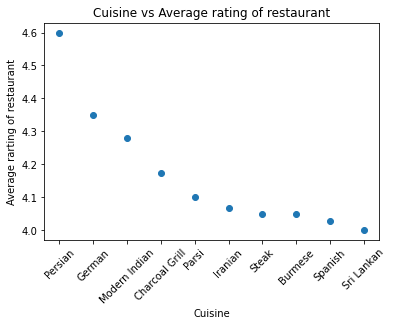

In [4]:
# function to plot rating and votes

def plotRatingVsVotes():
    ratingVsVotes={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        rating=row["Aggregate rating"]
        
        if rating==0:
            continue
            
        votes=row["Votes"]
        
        if ratingVsVotes.get(rating, "is empty")=="is empty":
            ratingVsVotes[rating]=[votes, 1]
        else:
            size=ratingVsVotes[rating][1]
            
            ratingVsVotes[rating]=[((ratingVsVotes[rating][0]*size)+votes)/(size+1), size+1]
        
    rating=[]
    votes=[]
    
    for i in ratingVsVotes:
        rating.append(i)
        votes.append(ratingVsVotes[i][0])
        
    np_rating=np.array(rating)
    np_votes=np.array(votes)
        
    sort_order=np_rating.argsort()[::-1]
    
#     plotting graph
    
    plt.xlabel("Rating")
    plt.ylabel("Average votes")
    plt.title("Rating vs Average votes")
    
    plt.plot(np_rating[sort_order], np_votes[sort_order], "--o")
    plt.show()
    
# function to plot rating and cuisines
    
def plotRatingVsCuisines():
    ratingVsCuisines={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        rating=row["Aggregate rating"]
        
        if rating==0:
            continue
            
        cuisines=len(row["Cuisines"].split(", "))
        
        if ratingVsCuisines.get(rating, "is empty")=="is empty":
            ratingVsCuisines[rating]=[cuisines, 1]
        else:
            size=ratingVsCuisines[rating][1]
            
            ratingVsCuisines[rating]=[((ratingVsCuisines[rating][0]*size)+cuisines)/(size+1), size+1]
        
    rating=[]
    cuisines=[]
    
    for i in ratingVsCuisines:
        rating.append(i)
        cuisines.append(ratingVsCuisines[i][0])
        
    np_rating=np.array(rating)
    np_cuisines=np.array(cuisines)
        
    sort_order=np_rating.argsort()[::-1]
    
#     plotting graph
    
    plt.xlabel("Rating")
    plt.ylabel("Average count of cuisines")
    plt.title("Rating vs Average count of cuisines")
    
    plt.plot(np_rating[sort_order], np_cuisines[sort_order], "--o")
    plt.show()
    
# function to plot rating and average cost
    
def plotRatingVsAverageCost():
    ratingVsAverageCost={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        rating=row["Aggregate rating"]
        
        if rating==0:
            continue
            
        averageCost=row["Average Cost for two"]
        
        if ratingVsAverageCost.get(rating, "is empty")=="is empty":
            ratingVsAverageCost[rating]=[averageCost, 1]
        else:
            size=ratingVsAverageCost[rating][1]
            
            ratingVsAverageCost[rating]=[((ratingVsAverageCost[rating][0]*size)+averageCost)/(size+1), size+1]
        
    rating=[]
    averageCost=[]
    
    for i in ratingVsAverageCost:
        rating.append(i)
        averageCost.append(ratingVsAverageCost[i][0])
        
    np_rating=np.array(rating)
    np_average_cost=np.array(averageCost)
        
    sort_order=np_rating.argsort()[::-1]
    
#     plotting graph
    
    plt.xlabel("Rating")
    plt.ylabel("Average cost")
    plt.title("Rating vs Average cost")
    
    plt.plot(np_rating[sort_order], np_average_cost[sort_order], "--o")
    plt.show()
    
# function to plot rating and restaurants serving specific cuisines
    
def plotRatingVsRestaurantServingSpecificCuisines():
    cuisineVsRating={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        rating=row["Aggregate rating"]
        
        if rating==0:
            continue
            
        cuisines=row["Cuisines"].split(", ")
        
        for cuisine in cuisines:
            if cuisineVsRating.get(cuisine, "is empty")=="is empty":
                cuisineVsRating[cuisine]=[rating, 1]
            else:                
                size=cuisineVsRating[cuisine][1]
                
                cuisineVsRating[cuisine]=[((cuisineVsRating[cuisine][0]*size)+rating)/(size+1), size+1]
                
    cuisines=[]
    rating=[]
    
    for i in cuisineVsRating:
        cuisines.append(i)
        rating.append(cuisineVsRating[i][0])
        
    np_cuisines=np.array(cuisines)
    np_rating=np.array(rating)
    
    sort_order=np_rating.argsort()[::-1]
    
#     plotting graph
    
    plt.xticks(rotation=45)
    plt.xlabel("Cuisine")
    plt.ylabel("Average rarting of restaurant")
    plt.title("Cuisine vs Average rating of restaurant")
    
    plt.scatter(np_cuisines[sort_order][:10], np_rating[sort_order][:10])
    plt.show()
    
# getting the dataframe corresponding to Indian restaurants

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

plotRatingVsVotes()
plotRatingVsCuisines()
plotRatingVsAverageCost()
plotRatingVsRestaurantServingSpecificCuisines()

In [5]:
# function to print the weighted restaurant rating of restaurants locality wise

def printWeightedRestaurantRatingOfRestaurantsLocalityWise():
    localityVsWeightedRating={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        locality=row["Locality"]
        votes=row["Votes"]
        rating=row["Aggregate rating"]      
        
        if rating==0:
            continue
        
        if localityVsWeightedRating.get(locality, "is empty")=="is empty":
            localityVsWeightedRating[locality]=[votes*rating, votes]
        else:
            prevMul=localityVsWeightedRating[locality][0]
            prevVotes=localityVsWeightedRating[locality][1]
            localityVsWeightedRating[locality]=[prevMul+(votes*rating), prevVotes+votes]
            
    locality=[]
    weightedRating=[]
    
    for i in localityVsWeightedRating:
        if localityVsWeightedRating[i][1]==0:        
            continue
            
        locality.append(i)
        weightedRating.append(localityVsWeightedRating[i][0]/localityVsWeightedRating[i][1])
        
    np_locality=np.array(locality)
    np_weighted_rating=np.array(weightedRating)
    
    sort_order=np_weighted_rating.argsort()[::-1]
    
#     printing the weighted ratings of the localities
    
    print("Weighted rating of top 10 localities", end="\n\n")
    
    for i in range(10):
        index=sort_order[i]
        
        print(np_locality[index], "{:.2f}".format(np_weighted_rating[index]))
    
    print()
    print("Weighted rating of remaining localities", end="\n\n")
        
    for i in range(10, len(np_locality)):
        index=sort_order[i]
        
        print(np_locality[index], "{:.2f}".format(np_weighted_rating[index]))
        
# getting the dataframe corresponding to Indian restaurants

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

printWeightedRestaurantRatingOfRestaurantsLocalityWise()

Weighted rating of top 10 localities

Hotel Clarks Amer, Malviya Nagar 4.90
Aminabad 4.90
Friends Colony 4.89
Powai 4.84
Kirlampudi Layout 4.82
Express Avenue Mall,  Royapettah 4.80
Deccan Gymkhana 4.80
Banjara Hills 4.72
Sector 5, Salt Lake 4.71
Riverside Mall, Gomti Nagar 4.70

Weighted rating of remaining localities

Jubilee Hills 4.62
Borivali West 4.60
New BEL Road 4.60
Chittoor Road 4.60
Cavelossim 4.60
Kidderpore 4.60
Arambol 4.60
Sainikpuri 4.60
Kilpauk 4.60
CMR Central Mall, Maddilapalem 4.60
JP Nagar 4.60
Gandhipuram 4.60
Shastri Nagar 4.60
Marathahalli 4.58
Anjuna 4.54
Indiranagar 4.54
Saibaba Colony 4.53
Panaji 4.52
Ulubari 4.51
Balewadi High Street, Balewadi 4.50
Phoenix Market City, Viman Nagar 4.50
R Deccan Mall, JM Road 4.50
Koramangala 7th Block 4.50
Prahlad Nagar 4.50
Pratap Nagar 4.50
Kasbah, Greater Kailash (GK) 1 4.50
Koramangala 5th Block 4.49
Hitech City 4.47
Ballygunge 4.46
Sarjapur Road 4.46
Pragati Maidan 4.45
Sector 26 4.45
Ellis Bridge 4.44
T. Nagar 4.42
Hol

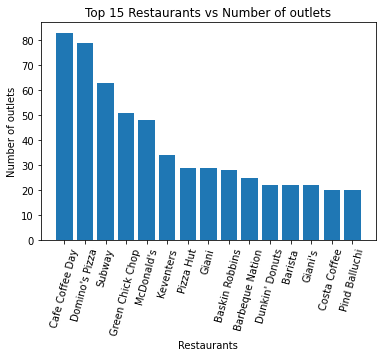

In [6]:
# function to plot the top 15 restaurants with maximum number of outlets

def plotTop15RestaurantsWithMaxNoOfOutlets():
    restaurantVsCount={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        name=row["Restaurant Name"]
        
        restaurantVsCount[name]=restaurantVsCount.get(name, 0)+1
        
    restaurant=[]
    count=[]
    
    for i in restaurantVsCount:
        restaurant.append(i)
        count.append(restaurantVsCount[i])
        
    np_restaurant=np.array(restaurant)
    np_count=np.array(count)
    
    sort_order=np_count.argsort()[::-1]
    
#     plotting graph
    
    plt.xticks(rotation=75)
    plt.xlabel("Restaurants")
    plt.ylabel("Number of outlets")
    plt.title("Top 15 Restaurants vs Number of outlets")
    
    plt.bar(np_restaurant[sort_order][:15], np_count[sort_order][:15])
    plt.show()
    
# getting the dataframe corresponding to Indian restaurants

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

plotTop15RestaurantsWithMaxNoOfOutlets()


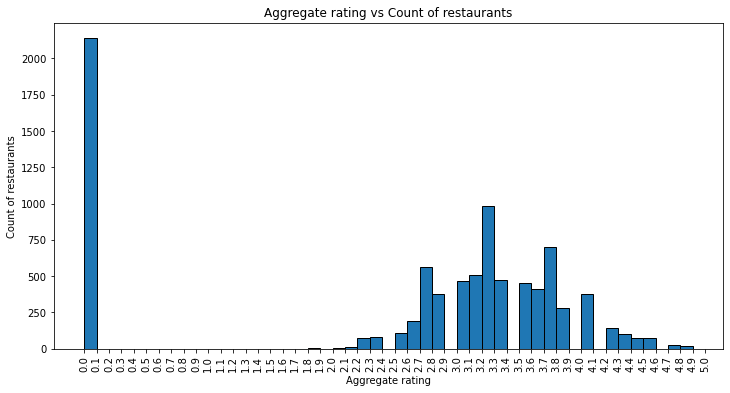

In [7]:
# function to plot aggregate rating of restaurant

def plotAggregateRatingOfRestaurant():
    rating=[]
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        resRating=row["Aggregate rating"]
        
        if rating==0:
            continue
            
        resRating=float("{:.1f}".format(resRating))
            
        rating.append(resRating)    
        
    np_rating=np.array(rating) 
    
#     plotting graph
    
    f=plt.figure()
    
    f.set_figheight(6)
    f.set_figwidth(12)  
    
    xt=np.arange(0, 5.1, 0.1)        
    plt.xticks(xt, rotation=90)     
    
    plt.xlabel("Aggregate rating")
    plt.ylabel("Count of restaurants")
    plt.title("Aggregate rating vs Count of restaurants")            
    
    bins=int((np_rating.max()-np_rating.min())/0.1)  
    
    plt.hist(rating, bins=bins, edgecolor="black")    
    plt.show()
    
# getting the dataframe corresponding to Indian restaurants

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

plotAggregateRatingOfRestaurant()

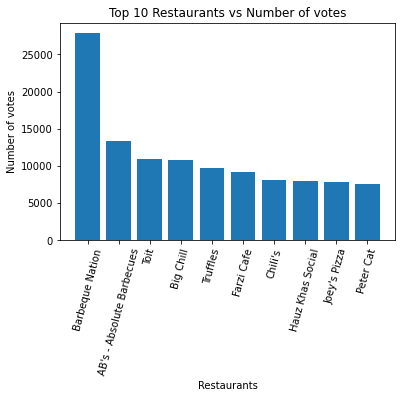

In [8]:
# function to plot top 10 restaurants with maximum number of votes

def plotTop10RestaurantsWithMaxNoOfVotes():
    restaurantVsVotes={}
    numRows=df_india.shape[0]
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        name=row["Restaurant Name"]
        votes=row["Votes"]
        
        restaurantVsVotes[name]=restaurantVsVotes.get(name, 0)+votes
        
    restaurant=[]
    votes=[]
    
    for i in restaurantVsVotes:
        restaurant.append(i)
        votes.append(restaurantVsVotes[i])
        
    np_restaurant=np.array(restaurant)
    np_votes=np.array(votes)
    
    sort_order=np_votes.argsort()[::-1]
    
#     plotting graph
    
    plt.xticks(rotation=75)
    plt.xlabel("Restaurants")
    plt.ylabel("Number of votes")
    plt.title("Top 10 Restaurants vs Number of votes")
    
    plt.bar(np_restaurant[sort_order][:10], np_votes[sort_order][:10])
    plt.show()
    
# getting the dataframe corresponding to Indian restaurants

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

plotTop10RestaurantsWithMaxNoOfVotes()

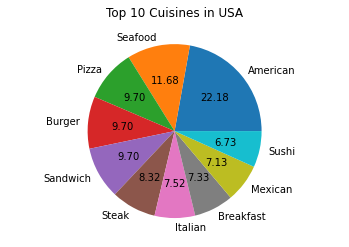

In [9]:
# function to plot top 10 cuisines of USA

def plotTop10CuisinesUsa():
    cuisinesVsCount={}
    numRows=df_usa.shape[0]
    
    for i in range(numRows):
        row=df_usa.iloc[i]
                
        cuisines=row["Cuisines"]
        
        if type(cuisines)==float:
            continue        
            
        cuisines=cuisines.split(", ")
        
        for cuisine in cuisines:
            cuisinesVsCount[cuisine]=cuisinesVsCount.get(cuisine, 0)+1
        
    cuisines=[]
    count=[]
    
    for i in cuisinesVsCount:
        cuisines.append(i)
        count.append(cuisinesVsCount[i])
        
    np_cuisines=np.array(cuisines)
    np_count=np.array(count)
    
    sort_order=np_count.argsort()[::-1]
    
#     plotting graph
    
    plt.axis("equal")
    plt.title("Top 10 Cuisines in USA")
    
    plt.pie(np_count[sort_order][:10], labels=np_cuisines[sort_order][:10], autopct="%.2f")
    plt.show()

# getting the data frame corresponding to US restaurants

df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_usa=df[df["Country Code"]==216]

plotTop10CuisinesUsa()

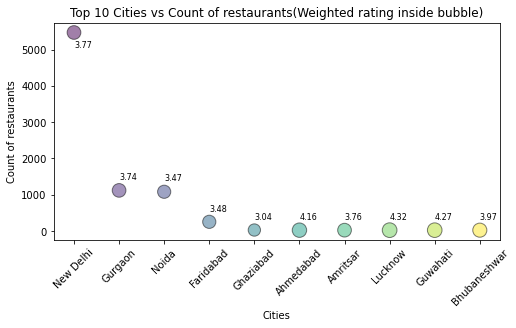

In [10]:
# function to plot City and Number of restaurants with Weighted rating as the bubble

def plotCityVsNumberOfRestaurantsVsWeightedRatingBubble():
    numRows=df_india.shape[0]
    cityVsNumRestaurantsWeightedRating={}
    
    for i in range(numRows):
        row=df_india.iloc[i]
        
        city=row["City"]
        votes=row["Votes"]
        rating=row["Aggregate rating"]
        
        if cityVsNumRestaurantsWeightedRating.get(city, "is empty")=="is empty":
            cityVsNumRestaurantsWeightedRating[city]=[1, votes*rating, votes]
        else:
            size=cityVsNumRestaurantsWeightedRating[city][0]        
            
            prevMul=cityVsNumRestaurantsWeightedRating[city][1]
            prevVotes=cityVsNumRestaurantsWeightedRating[city][2]            
            
            cityVsNumRestaurantsWeightedRating[city]=[size+1, prevMul+(votes*rating), prevVotes+votes]
    
    city=[]
    count=[]
    weightedRating=[]
    
    for i in cityVsNumRestaurantsWeightedRating:
        city.append(i)
        count.append(cityVsNumRestaurantsWeightedRating[i][0])
        weightedRating.append(cityVsNumRestaurantsWeightedRating[i][1]/cityVsNumRestaurantsWeightedRating[i][2])
        
    np_city=np.array(city)
    np_count=np.array(count)
    np_weighted_rating=np.array(weightedRating)        
    
    sort_order=np_count.argsort()[::-1]
    
    np_weighted_rating*=50
    
    f=plt.figure()    
    f.set_figwidth(8)  
    
#     plotting graph
    
    plt.xticks(rotation=45)
    plt.xlabel("Cities")
    plt.ylabel("Count of restaurants")
    plt.title("Top 10 Cities vs Count of restaurants(Weighted rating inside bubble)")
    
    c=np.arange(10)
    
    plt.text(np_city[sort_order][0], np_count[sort_order][0]-400, "{:.2f}".format(np_weighted_rating[sort_order][0]/50), fontsize=8)
    
    for i in range(1, 10):
        index=sort_order[i]
        
        plt.text(np_city[index], np_count[index]+300, "{:.2f}".format(np_weighted_rating[index]/50), fontsize=8)
    
    plt.scatter(np_city[sort_order][:10], np_count[sort_order][:10], s=np_weighted_rating[sort_order][:10], c=c, alpha=0.5, edgecolor="black")
    plt.show()

# getting the dataframe corresponding to Indian restaurants
    
df=pd.read_csv("zomato.csv", skipinitialspace=True, encoding="latin-1")

df_india=df[df["Country Code"]==1]

plotCityVsNumberOfRestaurantsVsWeightedRatingBubble()